# Veri Hazırlama

Kütüphaneler

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
import os
import pandas as pd
from torch.utils.data import (Dataset, DataLoader)
from skimage import io
import time

import warnings

warnings.filterwarnings("ignore")


Veri

In [20]:
class veri(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return(image, y_label)


Veri Hazırlama

In [21]:

dataset = veri(csv_file=r"../../veriler/f1_classification/f111.csv", root_dir=r"../../veriler/f1_classification", transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Resize(size=(28, 28)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]))


In [22]:
dataset


Veri Ön İşleme

In [23]:
train_set, test_set = torch.utils.data.random_split(dataset, [200, 79])
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=False)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)


In [24]:
train_set


In [25]:
test_set


Veri Görselleştirme

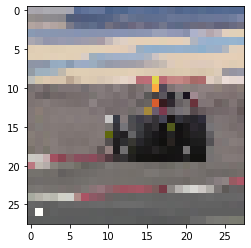

Redbull
torch.Size([1, 3, 28, 28])


In [26]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 1

classes = ["Ferrari", "Mclaren", "Mercedes", "Redbull"]


def imshow(img):

    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.size())


Model Mimarisini Oluşturma

In [27]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels=3,  out_channels=4,  kernel_size=(5, 5))
        self.conv2 = nn.Conv2d(
            in_channels=4,  out_channels=8,  kernel_size=(3, 3))
        self.conv3 = nn.Conv2d(
            in_channels=8,  out_channels=16, kernel_size=(2, 2))
        self.conv4 = nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=(2, 2))

        self.max = nn.MaxPool2d(kernel_size=(2, 2))
        self.func = nn.ELU()
        self.func1 = nn.ReLU()

        self.fullyconnect1 = nn.Linear(in_features=32, out_features=50)
        self.fullyconnect2 = nn.Linear(in_features=50, out_features=50)
        self.fullyconnect3 = nn.Linear(in_features=50, out_features=100)
        self.fullyconnect4 = nn.Linear(in_features=100, out_features=4)

    def forward(self, x):

        x = self.conv1(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv2(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv3(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv4(x)
        x = self.func(x)
        
        x = x.view(x.size(0), -1)  # flaten
        
        x = self.fullyconnect1(x)
        x = self.func(x)
        x = self.fullyconnect2(x)
        x = self.func(x)
        x = self.fullyconnect3(x)
        x = self.func(x)
        
        x = self.fullyconnect4(x)
        
        return x


Modelin Eğitimi

In [28]:
start = time.time()

model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

for i in range(epoch):
    for j, (images, label) in enumerate(train_loader):

        optimizer.zero_grad()
        out = model(images)
        loss = error(out, label)

        loss.backward()
        optimizer.step()

        print("Epoch [{}/{}, loss:{:.4f}]".format(i+1, j+1, loss.item()))

end = time.time()
print("Süre", end-start)


Epoch [1/1, loss:1.5265]
Epoch [1/2, loss:1.4699]
Epoch [1/3, loss:1.4191]
Epoch [1/4, loss:1.3566]
Epoch [1/5, loss:1.3355]
Epoch [1/6, loss:1.2994]
Epoch [1/7, loss:1.4783]
Epoch [1/8, loss:1.3582]
Epoch [1/9, loss:1.3561]
Epoch [1/10, loss:1.2142]
Epoch [1/11, loss:1.1995]
Epoch [1/12, loss:1.1928]
Epoch [1/13, loss:1.3423]
Epoch [1/14, loss:1.3381]
Epoch [1/15, loss:1.3204]
Epoch [1/16, loss:1.5631]
Epoch [1/17, loss:1.6724]
Epoch [1/18, loss:1.2934]
Epoch [1/19, loss:1.2787]
Epoch [1/20, loss:1.5869]
Epoch [1/21, loss:1.2475]
Epoch [1/22, loss:1.1313]
Epoch [1/23, loss:1.5663]
Epoch [1/24, loss:1.5710]
Epoch [1/25, loss:1.7390]
Epoch [1/26, loss:1.1788]
Epoch [1/27, loss:1.1693]
Epoch [1/28, loss:1.7331]
Epoch [1/29, loss:1.1799]
Epoch [1/30, loss:1.1733]
Epoch [1/31, loss:1.7219]
Epoch [1/32, loss:1.7242]
Epoch [1/33, loss:1.7099]
Epoch [1/34, loss:1.5337]
Epoch [1/35, loss:1.2549]
Epoch [1/36, loss:1.6709]
Epoch [1/37, loss:1.5202]
Epoch [1/38, loss:1.5190]
Epoch [1/39, loss:1.5

Modelin Testi

In [29]:
def dogruluk (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # test modu 

    with torch.no_grad(): # gradient (türev hesaplama)
        for x,y in loader:
            tahmin = model(x) # images
            _,pred = tahmin.max(1)
            num_correct += (pred==y).sum()
            num_samples += (pred.size(0))

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()


In [30]:
print("train doğruluk:")
dogruluk(train_loader, model)

print("test doğruluk:")
dogruluk(test_loader, model)

train doğruluk:
Got 150 / 200 with accuracy 75.00
test doğruluk:
Got 50 / 79 with accuracy 63.29


Modelin Eğitim ve Testi

In [33]:
start = time.time()
model = Net()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)

        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.3476 Accuracy: 26.5823 Error: 73.4177
iteration:  200 Loss: 1.2492 Accuracy: 31.6456 Error: 68.3544
iteration:  300 Loss: 1.7446 Accuracy: 53.1646 Error: 46.8354
iteration:  400 Loss: 0.0648 Accuracy: 49.3671 Error: 50.6329
iteration:  500 Loss: 0.3081 Accuracy: 73.4177 Error: 26.5823
iteration:  600 Loss: 0.0235 Accuracy: 53.1646 Error: 46.8354
iteration:  700 Loss: 0.1513 Accuracy: 73.4177 Error: 26.5823
iteration:  800 Loss: 0.0140 Accuracy: 54.4304 Error: 45.5696
iteration:  900 Loss: 0.1341 Accuracy: 74.6835 Error: 25.3165
iteration: 1000 Loss: 0.0268 Accuracy: 60.7595 Error: 39.2405
iteration: 1100 Loss: 0.1228 Accuracy: 77.2152 Error: 22.7848
iteration: 1200 Loss: 0.0041 Accuracy: 62.0253 Error: 37.9747
iteration: 1300 Loss: 0.0586 Accuracy: 74.6835 Error: 25.3165
iteration: 1400 Loss: 0.0033 Accuracy: 75.9494 Error: 24.0506
iteration: 1500 Loss: 0.0377 Accuracy: 73.4177 Error: 26.5823
iteration: 1600 Loss: 0.0024 Accuracy: 73.4177 Error: 26.5823
iteratio

In [31]:
start = time.time()
model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)

        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.3058 Accuracy: 20.2532 Error: 79.7468
iteration:  200 Loss: 1.2547 Accuracy: 20.2532 Error: 79.7468
iteration:  300 Loss: 1.2737 Accuracy: 35.4430 Error: 64.5570
iteration:  400 Loss: 0.9293 Accuracy: 43.0380 Error: 56.9620
iteration:  500 Loss: 1.0857 Accuracy: 53.1646 Error: 46.8354
iteration:  600 Loss: 0.7845 Accuracy: 44.3038 Error: 55.6962
iteration:  700 Loss: 1.1097 Accuracy: 55.6962 Error: 44.3038
iteration:  800 Loss: 0.7037 Accuracy: 46.8354 Error: 53.1646
iteration:  900 Loss: 1.0514 Accuracy: 54.4304 Error: 45.5696
iteration: 1000 Loss: 0.6220 Accuracy: 46.8354 Error: 53.1646
iteration: 1100 Loss: 1.0069 Accuracy: 60.7595 Error: 39.2405
iteration: 1200 Loss: 0.5648 Accuracy: 48.1013 Error: 51.8987
iteration: 1300 Loss: 1.0242 Accuracy: 63.2911 Error: 36.7089
iteration: 1400 Loss: 0.5100 Accuracy: 51.8987 Error: 48.1013
iteration: 1500 Loss: 1.1293 Accuracy: 67.0886 Error: 32.9114
iteration: 1600 Loss: 0.4492 Accuracy: 63.2911 Error: 36.7089
iteratio

Model Save

In [32]:
torch.save(model,"../Model_Save/modelsave.pth") # modelin tamamı kayıt edildi
torch.save(model.state_dict(),"../Model_Save/modelstatedict.pth") # modelin ağırlıkları kayıt edildi